In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

import earthpy as et

# set working dir
os.chdir(os.path.join(et.io.HOME, "git/wgms-glacier-project"))

In [2]:
# Open GLIMS 0 version 053019 polygons using geopandas
glims_file_path = "data/glims/raw/glims_download_20190530/glims_polygons.shp"
glims_polygons = gpd.read_file(glims_file_path)

In [3]:
# Quick look at the data
glims_polygons.head()

,line_type,anlys_id,glac_id,anlys_time,area,db_area,width,length,primeclass,min_elev,...,rc_id,geog_area,chief_affl,loc_unc_x,loc_unc_y,glob_unc_x,glob_unc_y,submitters,analysts,geometry
0,intrnl_rock,407187.0,G220886E60666N,2015-07-16T00:00:00,1053.720,1053.72000,0.0,0.0,0.0,752.0,...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Washington,50.0,50.0,80.0,80.0,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON Z ((-138.905798 60.517726 0, -138.9054..."
1,intrnl_rock,407187.0,G220886E60666N,2015-07-16T00:00:00,1053.720,1053.72000,0.0,0.0,0.0,752.0,...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Washington,50.0,50.0,80.0,80.0,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON Z ((-139.088149 60.567065 0, -139.0864..."
2,intrnl_rock,416449.0,G229065E56877N,2015-07-16T00:00:00,1.038,1.03769,0.0,0.0,0.0,1226.0,...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Washington,50.0,50.0,80.0,80.0,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON Z ((-130.94101 56.87622 0, -130.940591..."
3,intrnl_rock,407187.0,G220886E60666N,2015-07-16T00:00:00,1053.720,1053.72000,0.0,0.0,0.0,752.0,...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Washington,50.0,50.0,80.0,80.0,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON Z ((-138.756888 60.517819 0, -138.7569..."
4,intrnl_rock,407187.0,G220886E60666N,2015-07-16T00:00:00,1053.720,1053.72000,0.0,0.0,0.0,752.0,...,761.0,Randolph Glacier Inventory; Umbrella RC for me...,University of Washington,50.0,50.0,80.0,80.0,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON Z ((-139.096981 60.62941 0, -139.09601..."


In [4]:
# Open cleaned GTN-G region shapefile
glacier_regions_fp = "data/gtn-g-glacier-regions/cleaned/GTN-G_glacier_regions_201707_cleaned.shp"
glacier_regions = gpd.read_file(glacier_regions_fp)

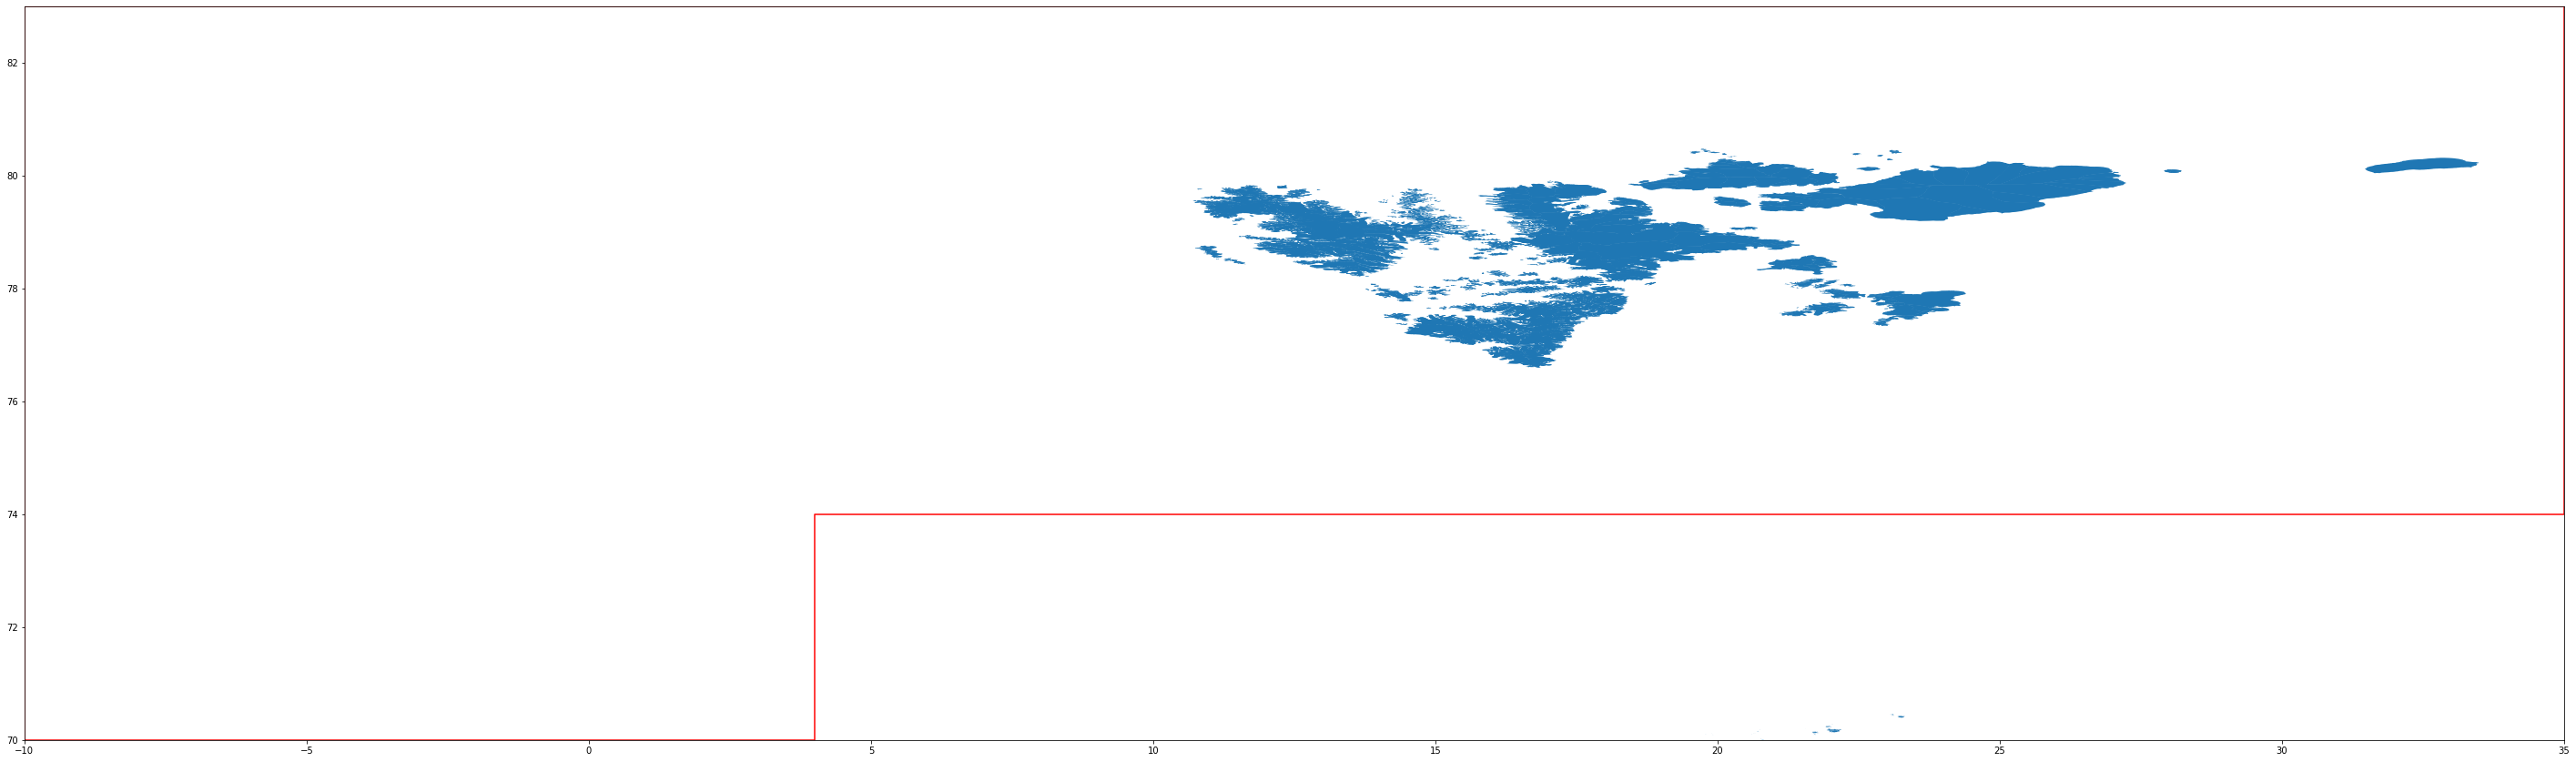

In [5]:
# Plot the region 7 outline on top of Region 7 data to make sure it is correct
fig, ax1 = plt.subplots(figsize=(50, 50))
minx, miny, maxx, maxy = glacier_regions.loc[6:6].total_bounds
ax1.set_xlim(minx, maxx)
ax1.set_ylim(miny, maxy)

glims_polygons.plot(ax=ax1)
glacier_regions.loc[6:6].boundary.plot(ax=ax1, color='red')

In [6]:
# This line finds pine island glacier in antarctica specifically
pine_island_glacier = glims_polygons[glims_polygons['glac_id']=='G263560E76894S']
pine_island_glacier[['glac_name', 'glac_id', 'src_date', 'length', 'width', 'area', 'db_area']].head()

,glac_name,glac_id,src_date,length,width,area,db_area
189589,Pine Island Glacier,G263560E76894S,2001-10-01T00:00:00,0.0,0.0,165078.0,165079.0
